# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


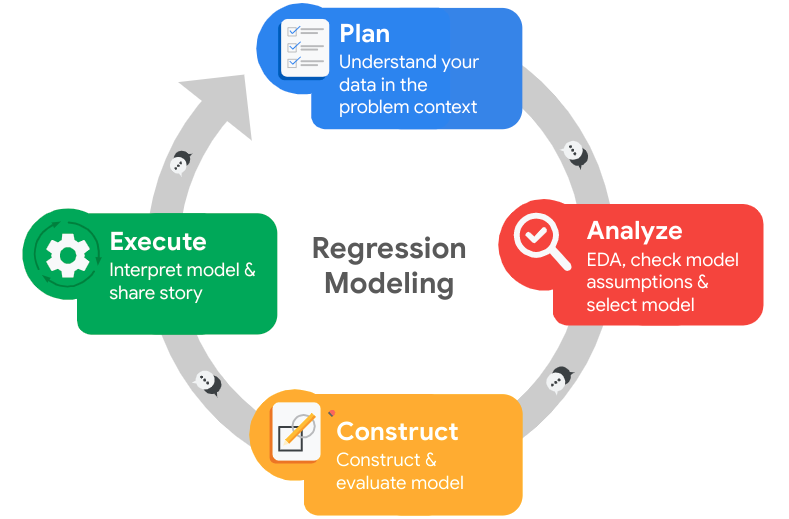

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [2]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df0.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [4]:
# Gather basic information about the data
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [5]:
# Gather descriptive statistics about the data
df0.describe()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [6]:
# Display all column names
df0.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Rename columns as needed
df0.columns = ['satisfaction', 'evaluation', 'num_projects', 'avg_monthly_hours', 'tenure', 'work_accident', 'left_company', 'promoted_last_5years', 'department', 'salary_level']


# Display all column names after the update
df0.columns


Index(['satisfaction', 'evaluation', 'num_projects', 'avg_monthly_hours',
       'tenure', 'work_accident', 'left_company', 'promoted_last_5years',
       'department', 'salary_level'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [8]:
# Check for missing values
df0.isna().sum()


satisfaction            0
evaluation              0
num_projects            0
avg_monthly_hours       0
tenure                  0
work_accident           0
left_company            0
promoted_last_5years    0
department              0
salary_level            0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [9]:
# Check for duplicates
df0.duplicated().sum()


3008

In [10]:
# Inspect some rows containing duplicates as needed
df0[df0.duplicated()]


,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left_company,promoted_last_5years,department,salary_level
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [11]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df0.drop_duplicates(keep = 'first')


# Display first few rows of new dataframe as needed
df.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left_company,promoted_last_5years,department,salary_level
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

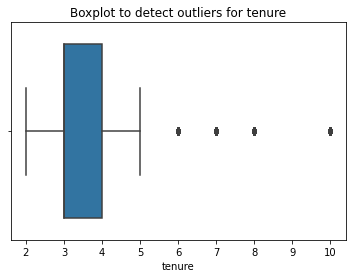

In [12]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
sns.boxplot(df['tenure'])



In [13]:
# Determine the number of rows containing outliers
Q1 = df['tenure'].quantile(0.25)
Q3 = df['tenure'].quantile(0.75)
IQR = Q3-Q1

upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR
outlier = df[(df['tenure'] > upper_limit) | (df['tenure'] < lower_limit)]

print(f"number of rows containing outliers in tenure column is : {len(outlier)}")



number of rows containing outliers in tenure column is : 824


Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



💭
### Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [14]:
# Get numbers of people who left vs. stayed
lvs =df['left_company'].value_counts()
print(f"number of people who left : {lvs.iloc[1]}")
print(f"number of people who stayed: {lvs.iloc[0]}")

# Get percentages of people who left vs. stayed
plvs =df['left_company'].value_counts(normalize = True)
print(f"percentages of people who left : {round(plvs.iloc[1],2)*100}%")
print(f"percentages of people who stayed: {round(plvs.iloc[0],2)*100}%")

number of people who left : 1991
number of people who stayed: 10000
percentages of people who left : 17.0%
percentages of people who stayed: 83.0%


### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

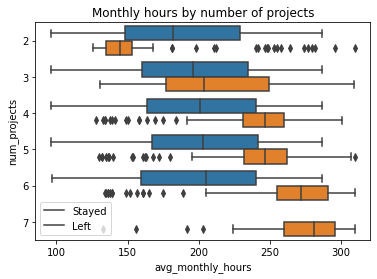

In [17]:
# Create a plot of Monthly hours by number of projects
sns.boxplot(data = df, y = 'num_projects', x = 'avg_monthly_hours', hue = 'left_company', orient = 'h')
plt.title("Monthly hours by number of projects")
plt.legend(['Stayed', 'Left'])
plt.show()

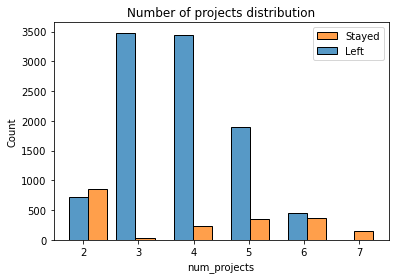

In [108]:
# Create a plot with projects histogram
sns.histplot(x = df['num_projects'], hue = df['left_company'], multiple = 'dodge', shrink=4)
plt.legend(['Stayed', 'Left'])
plt.title("Number of projects distribution")
plt.show()

#### Key findings:

* Workload and tenure: More projects generally lead to more hours, but not always proportionally.
* Departure groups:
   Group A: Worked less than peers, suggests potential firing or exit preparation.
   Group B: Worked significantly more, likely high contributors who quit due to workload.
* Project load: Everyone with 7 projects left, suggesting potential issue at that level.
* Optimal load: 3-4 projects seems ideal based on retention rates.
* Overall workload: Most employees appear overworked compared to standard work hours and vacation assumptions.(If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month. This means that, aside from the employees who worked on two projects, every group—even those who didn't leave the company—worked considerably more hours than this. It seems that employees here are overworked.)

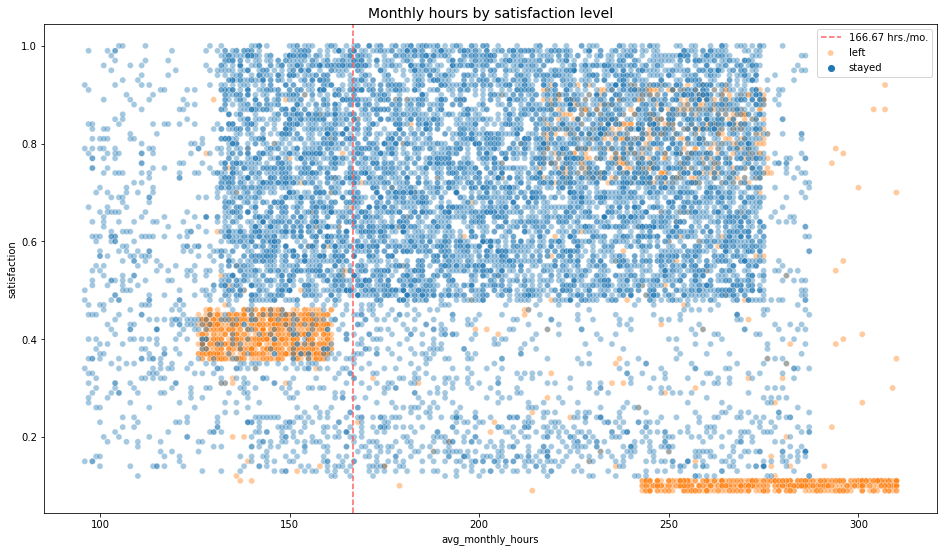

In [91]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='avg_monthly_hours', y='satisfaction', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Monthly hours by satisfaction level', fontsize='14');

#### Employee Work Hours and Satisfaction Insights:
* Overworked and Dissatisfied: A large group with ~240-315 hours/month (over 75 hours/week!) showed near-zero satisfaction, likely linked to excessive workload.
* Normal Hours, Low Satisfaction: Another group with normal hours still had low satisfaction (around 0.4), potentially due to peer pressure to work more.
* Moderate Hours, High Satisfaction: Finally, a group with ~210-280 hours/month had good satisfaction (0.7-0.9).

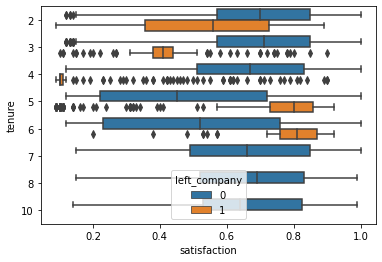

In [99]:
sns.boxplot(data=df, x='satisfaction', y='tenure', hue='left_company', orient="h")

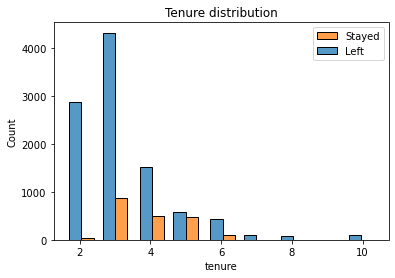

In [107]:
# Create a plot with tenure histogram
sns.histplot(x = df['tenure'], hue = df['left_company'], multiple = 'dodge', shrink=8)
plt.legend(['Stayed', 'Left'])
plt.title("Tenure distribution")
plt.show()

#### Key Employee Satisfaction & Tenure Insights:
1. Departures: Two main groups:
   * Dissatisfied, shorter-tenure: Suggesting potential onboarding or early career issues.
   * Very satisfied, medium-tenure: Highlights potential mid-career concerns.
2. 5-Year Tenure: Investigate policy changes impacting this specific group as their satisfaction is unusually low.
3. Longest Tenure: Loyal and satisfied, but potentially limited sample due to senior positions.
Next Step: Calculate average satisfaction scores for left/stayed groups for deeper analysis.

In [93]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df.groupby(['left_company'])['satisfaction'].agg([np.mean,np.median])


,mean,median
left_company,,
0,0.667365,0.69
1,0.440271,0.41



#### Employee Satisfaction Comparison:
* Left vs. Stayed: As expected, lower average satisfaction for departing employees compared to those who stayed.
* Stayed Group: Interestingly, their mean satisfaction slightly lower than the median, suggesting a left-skewed distribution. This means more employees clustered towards lower satisfaction within the group who stayed.

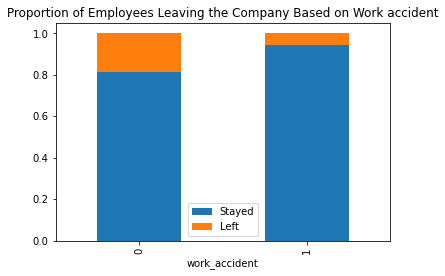

In [16]:
# Create a plot of Proportion of Employees Leaving the Company Based on Work accident
salary_level_left = df.groupby('work_accident')['left_company'].value_counts(normalize=True).unstack('left_company').plot.bar(stacked=True)
salary_level_left.legend(['Stayed', 'Left'])
plt.title("Proportion of Employees Leaving the Company Based on Work accident")
plt.show()


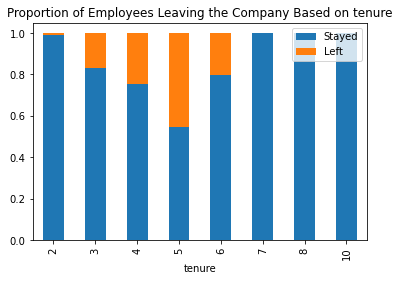

In [18]:
# Create a plot of Proportion of Employees Leaving the Company Based on tenure
(df.groupby('tenure')['left_company'].value_counts(normalize=True)
   .unstack('left_company').plot.bar(stacked=True)
)
plt.legend(['Stayed', 'Left'])
plt.title("Proportion of Employees Leaving the Company Based on tenure")
plt.show()

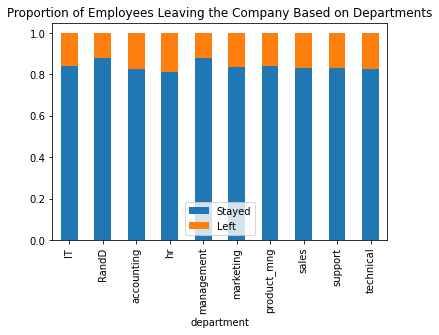

In [95]:
# Create a plot of Proportion of Employees Leaving the Company Based on Departments
(df.groupby('department')['left_company'].value_counts(normalize=True)
   .unstack('left_company').plot.bar(stacked=True)
)
plt.legend(['Stayed', 'Left'])
plt.title("Proportion of Employees Leaving the Company Based on Departments")
plt.show()

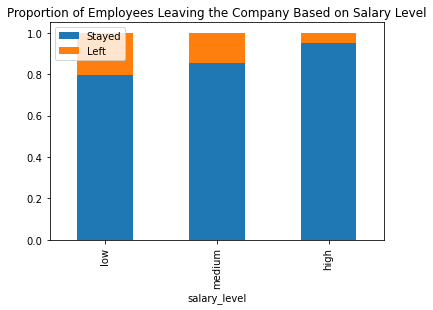

In [19]:
# Create a plot as needed
salary_level_left = df.groupby('salary_level')['left_company'].value_counts(normalize=True).unstack('left_company')

salary_level_left.loc[['low', 'medium', 'high']].plot.bar(stacked=True)
plt.legend(['Stayed', 'Left'])
plt.title("Proportion of Employees Leaving the Company Based on Salary Level")
plt.show()

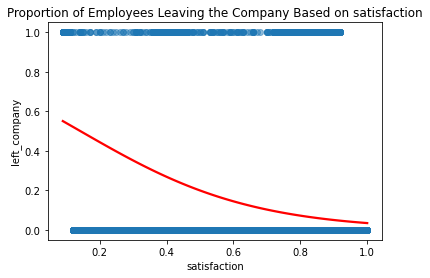

In [20]:
# Create a plot as needed
sns.regplot(x=df['satisfaction'], y=df['left_company'], logistic=True, ci=None, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title("Proportion of Employees Leaving the Company Based on satisfaction")
plt.show()

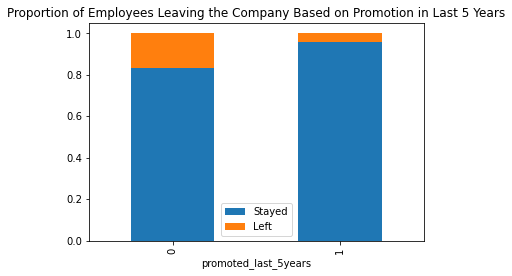

In [21]:
# Create a plot as needed
(df.groupby('promoted_last_5years')['left_company'].value_counts(normalize=True)
   .unstack('left_company').plot.bar(stacked=True)
)
plt.title("Proportion of Employees Leaving the Company Based on Promotion in Last 5 Years")
plt.legend(['Stayed', 'Left'])
plt.show()

#### Insights from Mini Visualization:
* Accident and Turnover: Proportion of employees leaving after a work accident needs further investigation.
* Tenure and Turnover: Employees with 5 years of tenure show the highest leaving rate. Explore reasons behind this specific group's higher turnover.
* Department Impact: No significant difference in turnover across departments suggests the issue may be company-wide rather than department-specific.
* Salary and Turnover: Lower salary earners seem to have a higher turnover rate, suggesting potential issues with compensation fairness or career progression.
* Promotion and Turnover: Analyze the proportion of employees leaving without promotions to understand if lack of career advancement contributes to turnover.

explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `avg_monthly_hours` versus `evaluation`

Text(0.5, 1.0, 'Monthly hours by last evaluation score')

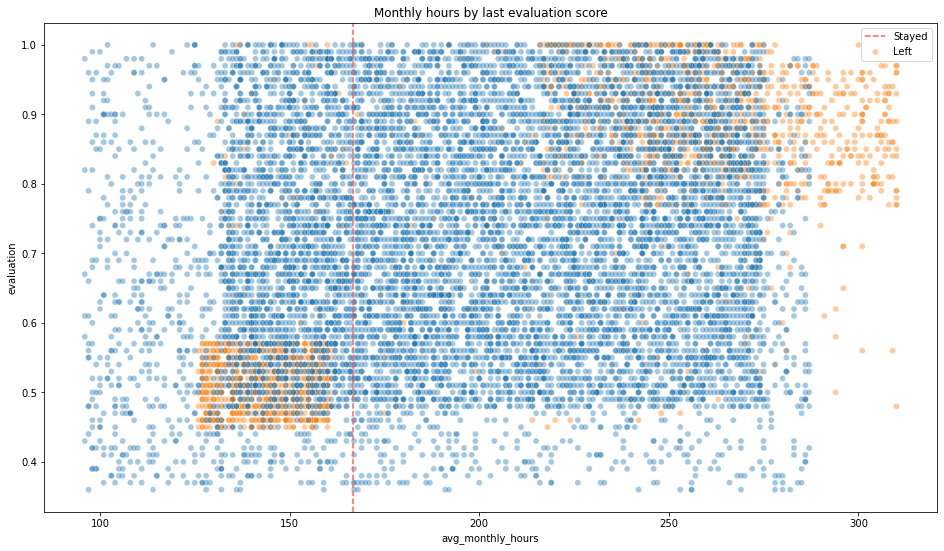

In [105]:
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df, x='avg_monthly_hours', y='evaluation', hue='left_company', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')
plt.legend(['Stayed', 'Left'])
plt.title("Monthly hours by last evaluation score")



#### Employee Performance and Workload Summary:
* Two Departing Groups:
   * Overworked & High Performers: Likely burned out due to excessive workload despite good performance.
   * Underworked & Lower Scores: Possibly dissatisfied with workload or other factors, reflected in lower evaluations.
* Workload & Evaluation: Hours worked seem to correlate with evaluation scores, but long hours don't guarantee high evaluations.
* Long Hours Prevalent: Most employees significantly exceed the standard 167-hour work month, suggesting potential overwork.

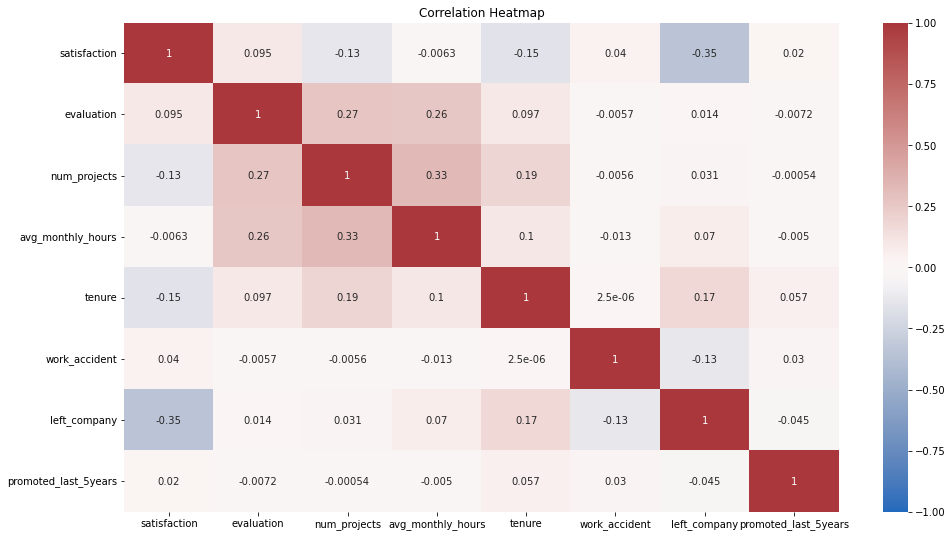

In [106]:
# Plot a correlation heatmap
plt.figure(figsize=(16, 9))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap');

#### Correlations:

* Positive: Number of projects, monthly hours, and evaluation scores are positively related (more projects tend to mean more hours and potentially higher evaluations).
* Negative: Employee satisfaction and being promoted in the past 5 years are negatively correlated with leaving (happier and recently promoted employees are less likely to leave).

### Insight
* Excessive workload: Long hours, many projects linked to departures, suggesting potential burnout.
* Limited recognition: Unrewarded long hours and low evaluation scores contribute to dissatisfaction.
* Poor management perception: Employee leaving suggests perceived mismanagement as a factor.
* Tenure & Retention: Employees with 6+ years show higher retention, indicating potential long-term commitment.

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?
- Which independent variables did you choose for the model and why?
- Are each of the assumptions met?
- How well does your model fit the data?
- Can you improve it? Is there anything you would change about the model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



[Double-click to enter your responses here.]

## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

The goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification. More specifically, this involves binary classification, since the outcome variable left can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

### Identify the types of models most appropriate for this task.

The predict (whether an employee leaves the company) is categorical, you could either build a Logistic Regression model, or a Tree-based Machine Learning model.

### Modeling

Add as many cells as you need to conduct the modeling process.

In [23]:
#Before splitting the data, encode the non-numeric variables. There are two: department and salary

df_enc = df.copy()

df_enc['salary_level'] = df_enc['salary_level'].map({'low' : 0, 'medium' : 1, 'high' : 2})

df_enc = pd.get_dummies(df_enc, drop_first = False)

df_enc.head()





,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left_company,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


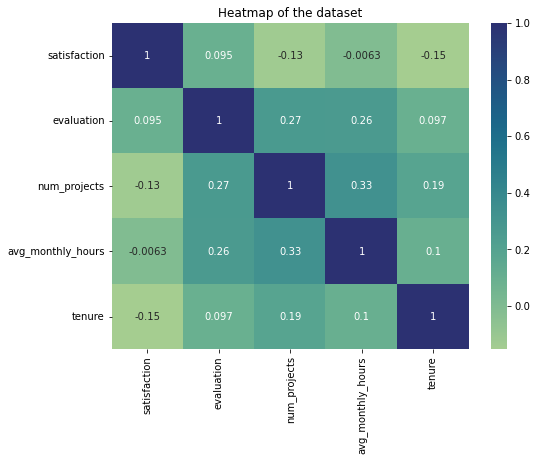

In [24]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 6))
sns.heatmap(df_enc[['satisfaction', 'evaluation', 'num_projects', 'avg_monthly_hours','tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

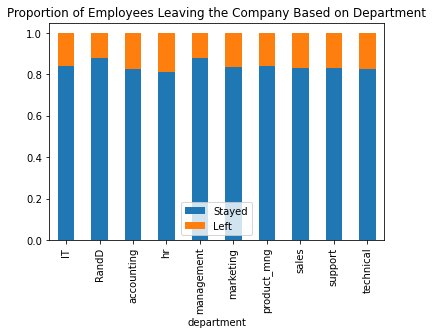

In [25]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
(df.groupby('department')['left_company'].value_counts(normalize=True)
   .unstack('left_company').plot.bar(stacked=True)
)
plt.legend(['Stayed', 'Left'])
plt.title("Proportion of Employees Leaving the Company Based on Department")
plt.show()


Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the tenure column that were identified earlier.

In [26]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left_company,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
# Isolate the outcome variable
y = df_logreg['left_company']

# Display first few rows of the outcome variable
y.head() 

0    1
2    1
3    1
4    1
5    1
Name: left_company, dtype: int64

In [32]:
# Select the features you want to use in your model
X = df_logreg.drop(columns = 'left_company')

# Display the first few rows of the selected features 
X.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0.41,0.50,2,153,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [35]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [36]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

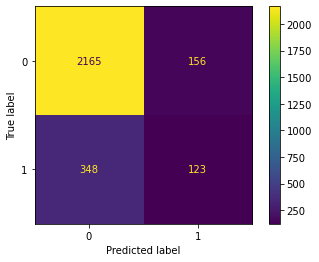

In [37]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

The upper-left quadrant displays the number of true negatives. The upper-right quadrant displays the number of false positives. The bottom-left quadrant displays the number of false negatives. The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the left column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [38]:
df_logreg['left_company'].value_counts(normalize=True)

0    0.831468
1    0.168532
Name: left_company, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [39]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.

### Modeling Approach B: Tree-based Model

This approach covers implementation of Decision Tree and Random Forest.

Isolate the outcome variable.

In [40]:
# Isolate the outcome variable
## we can use df_enc because tree-based don't need to drop outlier
y = df_enc['left_company']

# Display the first few rows of `y`
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left_company, dtype: int64

In [41]:
# Select the features
X = df_enc.drop(columns = 'left_company')

# Display the first few rows of `X`
X.head()

,satisfaction,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,0,1,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,0,1,0,0


In [42]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - Round 1

Construct a decision tree model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [43]:
# Instantiate model
tree = DecisionTreeClassifier(random_state = 0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }


# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [44]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 3.13 s, sys: 0 ns, total: 3.13 s
Wall time: 3.13 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [45]:
# Check best parameters
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [46]:
# Check best AUC score on CV
tree1.best_score_

0.969819392792457

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

Next, you can write a function that will help you extract all the scores from the grid search.

In [47]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [48]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

### Random forest - Round 1
Construct a random forest model and set up cross-validated grid-search to exhuastively search for the best model parameters.

In [49]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [50]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 10min 17s, sys: 0 ns, total: 10min 17s
Wall time: 10min 17s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [51]:
import os
os.getcwd()

'/home/jovyan/work'

In [52]:
# Define a path to the folder where you want to save the model

path = '/home/jovyan/work'

In [53]:
#Define functions to pickle the model and read in the model.
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         path of folder where you want to save the pickle
        model_object: a model you want to pickle
        save_as:      filename for how you want to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [54]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path:             path to folder where you want to read from
        saved_model_name: filename of pickled model you want to read in

    Out: 
        model: the pickled model 
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

In [55]:
# Write pickle
write_pickle(path, rf1, 'hr_rf1')

In [56]:
# Read pickle
rf1 = read_pickle(path, 'hr_rf1')

Identify the best AUC score achieved by the random forest model on the training set.

In [57]:
# Check best AUC score on CV
rf1.best_score_

0.9804250949807172

Identify the optimal values for the parameters of the random forest model.

In [58]:
# Check best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

Collect the evaluation scores on the training set for the decision tree and random forest models.

In [59]:
# Get all CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')

results = tree1_cv_results.append(rf1_cv_results)

results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

In [60]:
##Define a function that gets all the scores from a model's predictions.

def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string):  How you want your model to be named in the output table
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                         })
  
    return table

In [61]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
results = results.append(rf1_test_scores)

results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

## Feature Engineering

You might be skeptical of the high evaluation scores. There is a chance that there is some data leakage occurring. Data leakage is when you use data to train your model that should not be used during training, either because it appears in the test data or because it's not data that you'd expect to have when the model is actually deployed. Training a model with leaked data can give an unrealistic score that is not replicated in production.

In this case, it's likely that the company won't have satisfaction levels reported for all of its employees. It's also possible that the `average_monthly_hours` column is a source of some data leakage. If employees have already decided upon quitting, or have already been identified by management as people to be fired, they may be working fewer hours.

The first round of decision tree and random forest models included all variables as features. This next round will incorporate feature engineering to build improved models.

You could proceed by dropping `satisfaction_level` and creating a new feature that roughly captures whether an employee is overworked. You could call this new feature `overworked`. It will be a binary variable.

In [62]:
# Drop `satisfaction` and save resulting dataframe in new variable
df2 = df_enc.drop(columns = 'satisfaction')

# Display first few rows of new dataframe

df2.head()

,evaluation,num_projects,avg_monthly_hours,tenure,work_accident,left_company,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,0.86,5,262,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,0.88,7,272,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0
3,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [63]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df['avg_monthly_hours']

# Inspect max and min average monthly hours values

df2['overworked'].describe()

count    11991.000000
mean       200.473522
std         48.727813
min         96.000000
25%        157.000000
50%        200.000000
75%        243.000000
max        310.000000
Name: overworked, dtype: float64

If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday–Friday = 50 weeks * 40 hours per week / 12 months = 166.67 hours per month

166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

You could define being overworked as working more than 175 hours per month on average.

To make the `overworked` column binary, you could reassign the column using a boolean mask.

In [64]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = np.where( df2['avg_monthly_hours'] > 175, 1, 0)
# Display first few rows of new column

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

In [65]:
# Drop the `average_monthly_hours` column
df2 = df2.drop(columns = 'avg_monthly_hours')

# Display first few rows of resulting dataframe
df2.head()

,evaluation,num_projects,tenure,work_accident,left_company,promoted_last_5years,salary_level,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.86,5,6,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
2,0.88,7,4,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
3,0.87,5,5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1
4,0.52,2,3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [66]:
# Isolate the outcome variable
y = df2['left_company']

# Select the features
X = df2.drop(columns = 'left_company')

In [67]:
# Create test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### Decision tree - Round 2

In [68]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [69]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 2.51 s, sys: 0 ns, total: 2.51 s
Wall time: 2.51 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                

In [70]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [71]:
# Check best AUC score on CV
tree2.best_score_

0.9586752505340426

This model performs very well, even without satisfaction levels and detailed hours worked data.

Next, check the other scores.

In [72]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')

results = results.append(tree2_cv_results)

results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439
0,decision tree2 cv,0.856693,0.903553,0.878882,0.958523,0.958675


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

Random forest - Round 2

In [73]:

# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

# Assign a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1', 'roc_auc'}

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [74]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 7min 48s, sys: 0 ns, total: 7min 48s
Wall time: 7min 48s


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [75]:
# Write pickle
write_pickle(path, rf2, 'hr_rf2')

In [76]:
# Read in pickle
rf2 = read_pickle(path, 'hr_rf2')

In [77]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [78]:
# Check best AUC score on CV
rf2.best_score_

0.9648100662833985

In [79]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')

results = results.append(rf2_cv_results)
results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439
0,decision tree2 cv,0.856693,0.903553,0.878882,0.958523,0.958675
0,random forest2 cv,0.866758,0.878754,0.872407,0.957411,0.964810


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

Score the champion model on the test set now.

In [80]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)

results = results.append(rf2_test_scores)
results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819
0,random forest cv,0.950023,0.915614,0.932467,0.977983,0.980425
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439
0,decision tree2 cv,0.856693,0.903553,0.878882,0.958523,0.958675
0,random forest2 cv,0.866758,0.878754,0.872407,0.957411,0.964810
0,random forest2 test,0.870406,0.903614,0.886700,0.961641,0.938407


This seems to be a stable, well-performing final model.

Plot a confusion matrix to visualize how well it predicts on the test set.

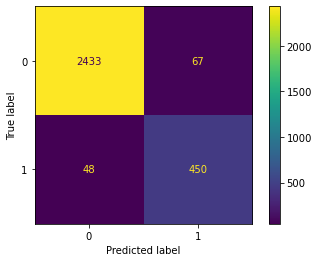

In [81]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

For exploratory purpose, you might want to inspect the splits of the decision tree model and the most important features in the random forest model.

### Decision tree splits

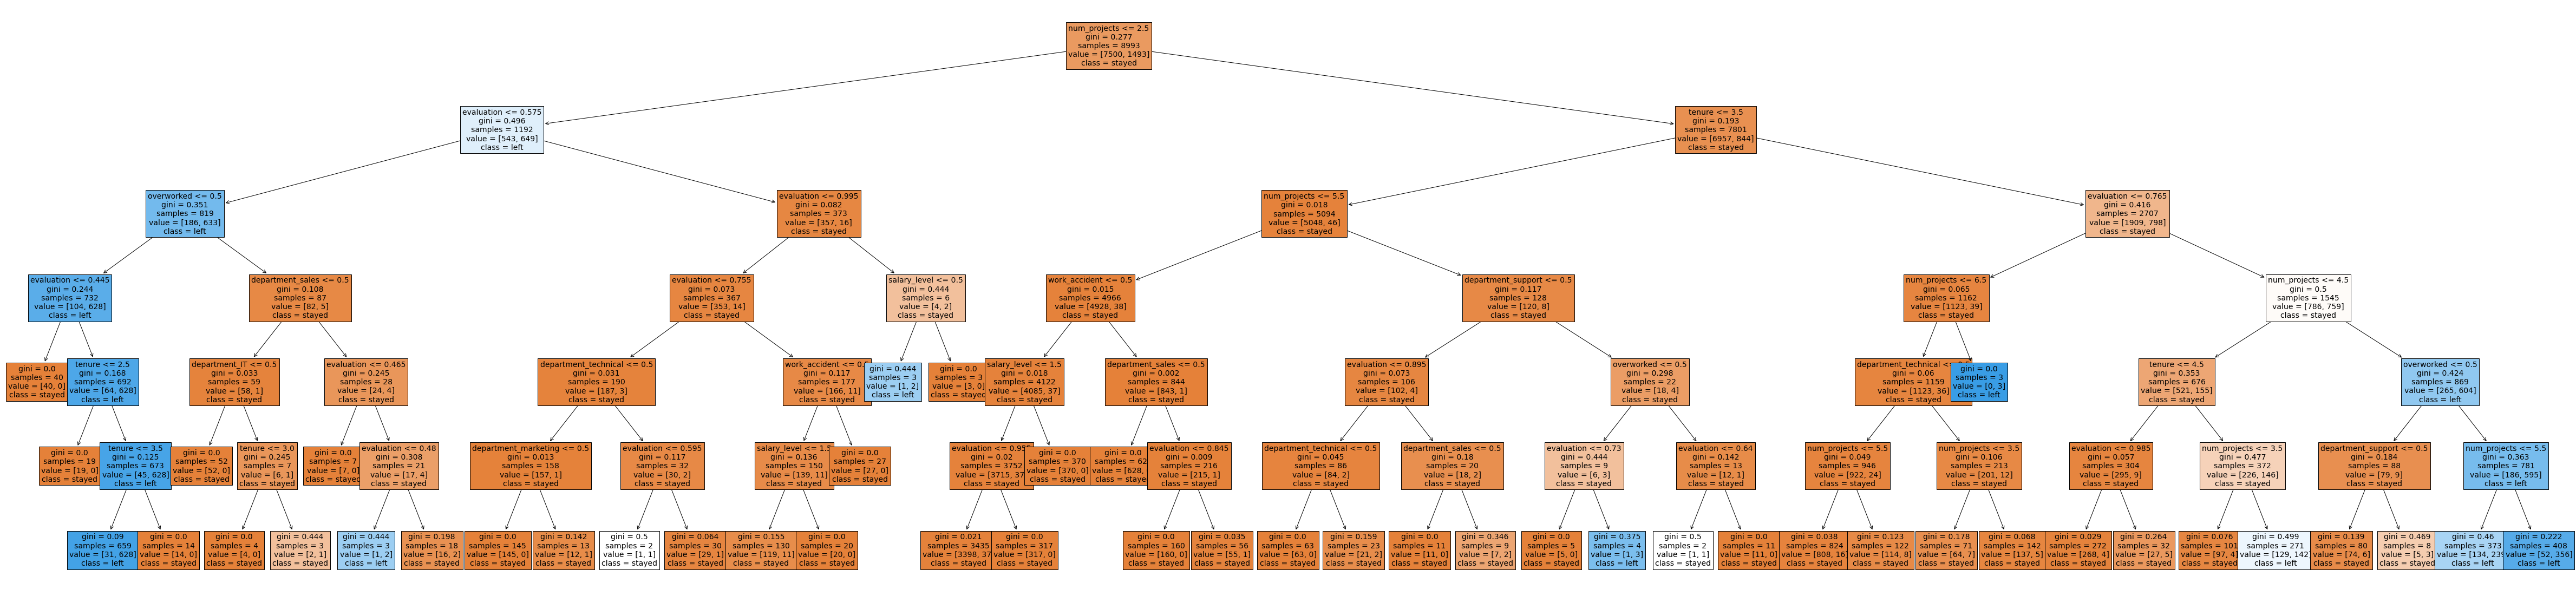

In [82]:
# Plot the tree
plt.figure(figsize=(85,20))
plot_tree(tree2.best_estimator_, max_depth=6, fontsize=14, feature_names=X.columns, 
          class_names={0:'stayed', 1:'left'}, filled=True);
plt.show()
# Note that you can double-click on the tree image to zoom in on it and inspect the splits.

### Decision tree feature importance

In [83]:
#tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, columns=X.columns)
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
evaluation,0.343958
num_projects,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary_level,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


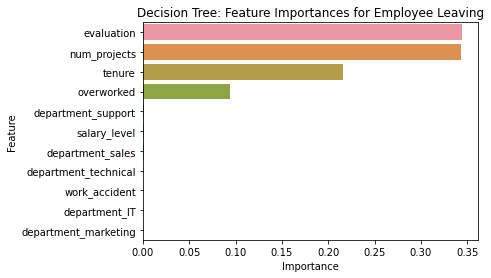

In [84]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The barplot above shows that in this decision tree model, `evaluation` , `num_projects`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### Random forest feature importance
Now, plot the feature importances for the random forest model.

Text(0.5, 0, 'Importance')

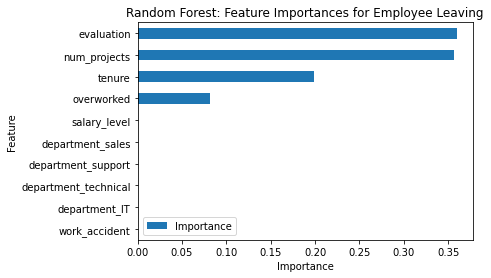

In [88]:
# Get feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Get indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Get column labels of top 10 features 
feat = X.columns[ind]

# Filter `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

The plot above shows that in this random forest model, `evaluation`, `num_projects`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model. 

### Conclusion, Recommendations, Next Steps



Employee models and feature analysis indicate **overwork** as a key driver of low retention.

Impactful Solutions:

**Workload Management**:
* Limit projects per employee.
* Investigate & address 4+ year tenure dissatisfaction.
* Clarify overtime expectations & rewards.
**Communication & Culture**:
* Open forums to address work culture concerns.
* Reassess evaluation criteria (don't reward excessive hours).
**Additional Considerations**:
* Offer flexible work arrangements.
* Promote work-life balance & well-being initiatives.


**Next Steps Summary** :
Data Leakage Concern:

Investigate if employee "evaluation" data might be leaking into retention predictions.
Test model without "evaluation" to check its impact.
Explore alternate prediction targets like performance or satisfaction if necessary.
Further Exploration:

Consider using K-means clustering to identify employee groups with specific characteristics.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.




